# Part One: Cat vs. Dog Image Classification


**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training tim.

In [25]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip # downloads the dataset using an api and saves it to the tmp directory

--2024-11-05 20:11:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  19.9MB/s    in 4.1s    

2024-11-05 20:11:12 (15.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [26]:
import os # import module to interact with the OS
import zipfile # imports module to work with ZIP files

local_zip = '/tmp/cats_and_dogs_filtered.zip' # defines the path the downloaded dataset files
zip_ref = zipfile.ZipFile(local_zip, 'r') # creates a zipfile object to be read
zip_ref.extractall('/tmp') # extracts the contents in the zip file
zip_ref.close() # closes the zip file to free up resources

In [27]:
base_dir = '/tmp/cats_and_dogs_filtered' # sets base directory path extracted dataset
train_dir = os.path.join(base_dir, 'train') # creates full path to training data
validation_dir = os.path.join(base_dir, 'validation') # creates full path to validation data

train_cats_dir = os.path.join(train_dir, 'cats') # creates path to directory containing training images of cats

train_dogs_dir = os.path.join(train_dir, 'dogs') # creates path to directory containing training images of dogs

validation_cats_dir = os.path.join(validation_dir, 'cats') # creates path to directory containing validation images of cats

validation_dogs_dir = os.path.join(validation_dir, 'dogs') # creates path to directory containing validation images of dogs

In [28]:
train_cat_fnames = os.listdir(train_cats_dir) # lists all the file names in the train cat directory and assigns to train cat fnames variable
print(train_cat_fnames[:10]) # slices the train cat fname variable to get first 10 filenames and outputs them

train_dog_fnames = os.listdir(train_dogs_dir) # lists all the file names in the train dog directory and assigns to train dog fnames variable
train_dog_fnames.sort() # sorts the list of dog filenames alphabetically
print(train_dog_fnames[:10]) # slices the train dog fname variable to get first 10 filenames and outputs them

['cat.271.jpg', 'cat.341.jpg', 'cat.752.jpg', 'cat.789.jpg', 'cat.283.jpg', 'cat.14.jpg', 'cat.10.jpg', 'cat.732.jpg', 'cat.894.jpg', 'cat.622.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [29]:
print('total training cat images:', len(os.listdir(train_cats_dir))) # counts the number of images in the train cat directory and outputs with total etc.
print('total training dog images:', len(os.listdir(train_dogs_dir))) # counts the number of images in the train dog directory and outputs with total etc.
print('total validation cat images:', len(os.listdir(validation_cats_dir))) # counts the number of images in the validation cat directory and outputs with total etc.
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) # counts the number of images in the validation dog directory and outputs with total etc.

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [31]:
%matplotlib inline
# a "magic command" that makes matplotlib display directly below the cells

import matplotlib.pyplot as plt # imports the matplotlib plotting module
import matplotlib.image as mpimg # imports the matplotlib image reading module

nrows = 4 # sets number of images per row to 4
ncols = 4 # sets number of images per column to 4

pic_index = 0 #sets the picture index to 0

In [32]:

fig = plt.gcf() # assigns current image to fig
fig.set_size_inches(ncols * 4, nrows * 4) # configures the size of image by multiplying the columns and rows by 4 inches

pic_index += 8 # increments the picture index by 8 to select the next set of 8 images from cats and dogs
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]  # Slices 'train_cat_fnames' to get filenames and adds file path
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]] # Slices 'train_dog_fnames' to get filenames and adds file path

# loops through combined list of cat and dog images
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1) # creates a subplot in the figure grid
  sp.axis('Off') # turns off the axis for subplot, which contains ticks and labels

  img = mpimg.imread(img_path) # reads image from image file path and assigns tom img
  plt.imshow(img) # displays image in subplot

plt.show() # renders and displays the entire grid of images


Output hidden; open in https://colab.research.google.com to view.

In [33]:
from tensorflow.keras import layers # imports layer module from tf.kers. allows for creating NN structures
from tensorflow.keras import Model # imports Model class from tf.keras. allows for creating Keras model object used to define and train DL models

In [34]:

img_input = layers.Input(shape=(150, 150, 3)) # defines an input layer with a shape of 150, 150, 3 (H,W,C)

x = layers.Conv2D(16, 3, activation='relu')(img_input) # adds 2D convoltional layer with 16 filters to extract features, a kernel of 3, and ReLU activation to introduce non-linearity
x = layers.MaxPooling2D(2)(x) # adds a max pooling layer with a size of 2 which reduces the spatial dimensions to decrease computational complexity

x = layers.Conv2D(32, 3, activation='relu')(x) # adds another 2D convoltional layers with 32 filters to learn more features, a kernel of 3, and ReLU activation. This layer processes the output of previous max pooling layer
x = layers.MaxPooling2D(2)(x) # adds another max pooling layer with a size of 2 to reduce spatial dimensions to decrease computational complexity

x = layers.Conv2D(64, 3, activation='relu')(x) # adds 3rd 2D convolutional layer with 64 filkters for more complex feature distinguishment, kernel of 3, and ReLU activation. This layer processes the output of previous max pooling layer
x = layers.MaxPooling2D(2)(x) # adds another max pooling layer with a size of 2 to reduce spatial dimensions to decrease computational complexity

In [35]:

x = layers.Flatten()(x) # flattens the layers in the previous convolutional layer into 1d vector

x = layers.Dense(512, activation='relu')(x) # adds a dense fully conncected layer with 512 units(neurons) and ReLU activation, learns high level features from flattened da

output = layers.Dense(1, activation='sigmoid')(x) # adds the output layer with 1 neuron(cat/dog binary classification) and a sigmoid activation function(probability function)

model = Model(img_input, output) # created model by specifying input and output layer

In [36]:
model.summary() # allows for visualization of what each layer of model looks like

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       9,470,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.optimizers import RMSprop # imports RMSprop optimizer (adaptive learning rate optimizer thats well suited for DNN)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc']) # compiles the model with following specifications:
              # - 'loss='binary_crossentropy'': Uses the binary cross-entropy loss function, which is suitable for binary classification tasks.
              # - 'optimizer=RMSprop(learning_rate=0.001)': Sets the optimizer to RMSprop with a learning rate of 0.001.
              #    - The learning rate determines how much the model weights are adjusted in response to the loss gradient.
              # - 'metrics=['acc']': Specifies 'accuracy' as the metric to monitor during training and evaluation.
              #    - 'acc' stands for accuracy, which measures the proportion of correctly classified images.

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # imports IDG class which helps with improving model generalization

train_datagen = ImageDataGenerator(rescale=1./255) # rescales the training data pixel values with a range of 0 to .255 to 0 to 1. helps model train more efficiently
val_datagen = ImageDataGenerator(rescale=1./255) # rescales the validation data pixel values with a range of 0 to .255 to 0 to 1. helps model train more cohesively

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') # specifies trainining directory, resizes all images to 150 x 150 pixels, defines number of images per batch, and sets class mode to binary(cat/dog). Generates batches of image data from training and labels images

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary') # specifies validation directory, resizes all images to 150 x 150 pixels, defines number of images per batch, and sets class mode to binary(cat/dog). Generates batches of image data from validation for model eval

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
history = model.fit(
      train_generator, # uses the training data genrator
      epochs=15, # iterates over the training data 15 times with 20 images each
      validation_data=validation_generator, # supplies batches of validation data to eval models performance after last epoch
      verbose=2) # turns off the porgress bar but details logging for each epoch

# Note: This cell might produce a warning message about 'Your `PyDataset` class' but it should still run fine

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 - 8s - 84ms/step - acc: 0.5460 - loss: 0.7656 - val_acc: 0.5000 - val_loss: 0.6963
Epoch 2/15
100/100 - 6s - 60ms/step - acc: 0.6255 - loss: 0.6565 - val_acc: 0.6820 - val_loss: 0.6038
Epoch 3/15
100/100 - 11s - 108ms/step - acc: 0.6705 - loss: 0.6168 - val_acc: 0.6650 - val_loss: 0.6260
Epoch 4/15
100/100 - 9s - 92ms/step - acc: 0.7170 - loss: 0.5467 - val_acc: 0.6170 - val_loss: 0.7366
Epoch 5/15
100/100 - 5s - 46ms/step - acc: 0.7555 - loss: 0.5068 - val_acc: 0.7170 - val_loss: 0.5454
Epoch 6/15
100/100 - 7s - 66ms/step - acc: 0.8070 - loss: 0.4356 - val_acc: 0.7190 - val_loss: 0.5598
Epoch 7/15
100/100 - 9s - 91ms/step - acc: 0.8455 - loss: 0.3654 - val_acc: 0.7000 - val_loss: 0.6954
Epoch 8/15
100/100 - 6s - 63ms/step - acc: 0.8700 - loss: 0.2813 - val_acc: 0.7150 - val_loss: 0.6423
Epoch 9/15
100/100 - 9s - 93ms/step - acc: 0.9225 - loss: 0.2037 - val_acc: 0.7220 - val_loss: 0.7031
Epoch 10/15
100/100 - 6s - 56ms/step - acc: 0.9500 - loss: 0.1255 - val_acc: 0.7210 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


<ipython-input-43-845efd271cc7>:30: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
<ipython-input-43-845efd271cc7>:33: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


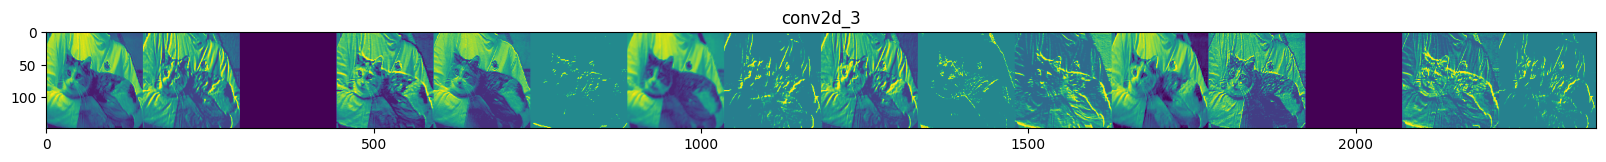

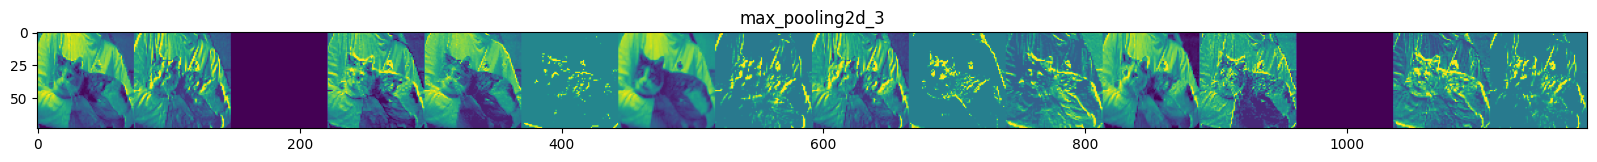

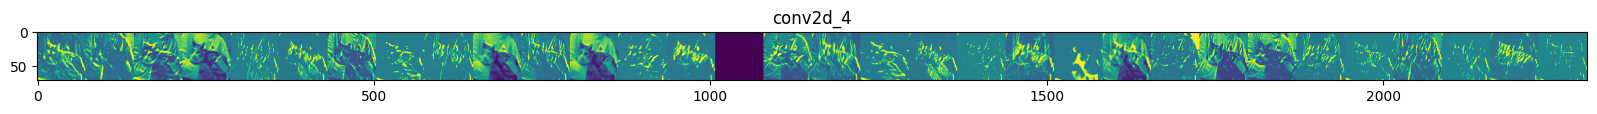

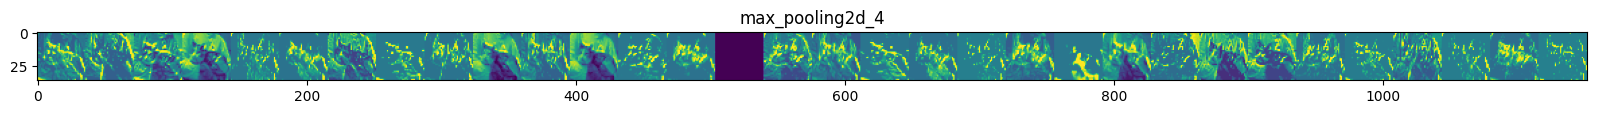

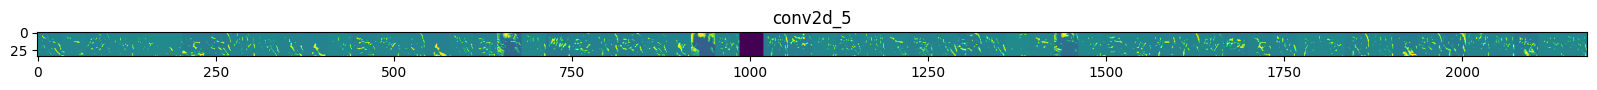

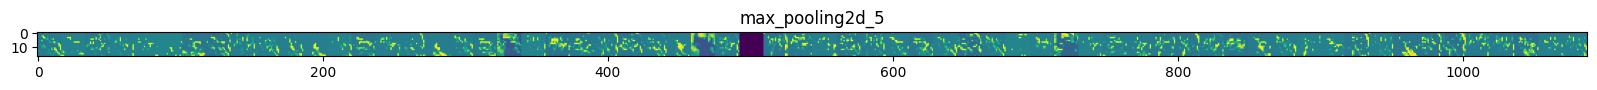

In [43]:
import numpy as np # imports the numpy library
import random # imports the random module
from tensorflow.keras.preprocessing.image import img_to_array, load_img # imports tool for converting image to numpy array and tool for loading image in from a file path and resizes it

successive_outputs = [layer.output for layer in model.layers[1:]] # creates a list of outputs for all layers in model excpet input layer, used to visualize feature maps of each layer
visualization_model = Model(img_input, successive_outputs) # creates a new model called visualization model that takes the input and outputs the feature map for each lauer

cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames] # creates a list of file paths for all cat images in training directory
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames] # creates a list of file paths for all dog images in training directory
img_path = random.choice(cat_img_files + dog_img_files) # randomly selects image file path from list of cat and dogs images

img = load_img(img_path, target_size=(150, 150)) # loads selected imge and resizes to 150 x 150 pixels
x = img_to_array(img) # converts image to numpy array
x = x.reshape((1,) + x.shape) # reshapes array to add an extra dimension making it suitable for model prediction, where 1 is the batch size

x /= 255 # normalizes the the image to the data to the range 1 to 0 to match input format

successive_feature_maps = visualization_model.predict(x) # passes image through visualization model to get features for each layer

layer_names = [layer.name for layer in model.layers[1:]] # extracts the names of all layers in the model to use in visualization

# loops through each layers name and corresponding feature map
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4: # checks to see if there are 4 dimensions (batch size, height, width, and number of features)
    n_features = feature_map.shape[-1] # number of features or filters in feature map
    size = feature_map.shape[1] # height and width of feature map
    display_grid = np.zeros((size, size * n_features)) # creates an empty grid to display all feature maps side by side
    for i in range(n_features): # kiios through each feature/filter in feature map
      x = feature_map[0, :, :, i] # extracts the ith feature
      x -= x.mean() # normalize feature map by subtracting the mean
      x /= x.std() # divides by the standard deviation to standardize feature values
      x *= 64 # scales values to enhance contrast
      x += 128 # shifts values to nake more visually interpretable
      x = np.clip(x, 0, 255).astype('uint8') # clips the values to the range (0,255) and converts to 8 bit integers for display
      display_grid[:, i * size : (i + 1) * size] = x  # places normalized feature map in display grid
    scale = 20. / n_features # sets scale for figure size based on number of features
    plt.figure(figsize=(scale * n_features, scale)) # creates a new figure with specified size
    plt.title(layer_name) # sets the title of figure to name of layer
    plt.grid(False) # turns off grid lines
    plt.imshow(display_grid, aspect='auto', cmap='viridis') # displays the feature maps using viridis colormap

# Note: This cell might also produce a warning but again, it should run fine

Text(0.5, 1.0, 'Training and validation loss')

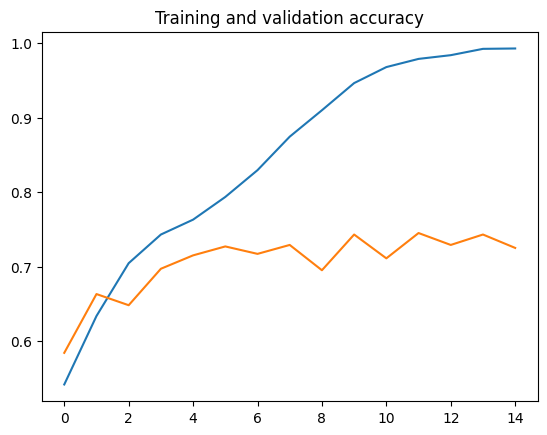

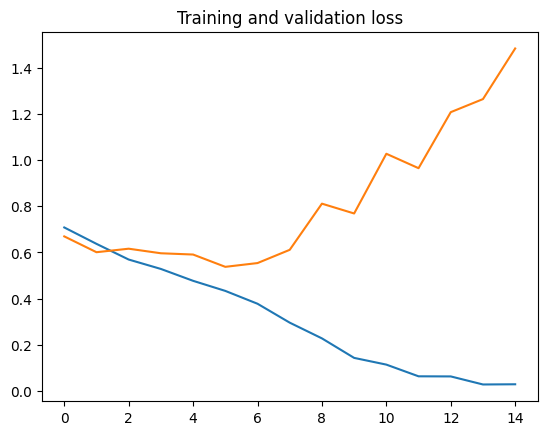

In [ ]:

acc = history.history['acc'] # extracts the trianing accuracy values from history object(stores values of metrics recorded during trianing)
val_acc = history.history['val_acc'] # extracts the validation accuract values from history object

loss = history.history['loss'] # extracts the training loss values from history object
val_loss = history.history['val_loss'] # extracts the validation loss values from history object

epochs = range(len(acc)) # creates a range object representing number of epochs

plt.plot(epochs, acc) # plots trianing accuracy over epochs
plt.plot(epochs, val_acc) # plots the validation accuracy over the epochs
plt.title('Training and validation accuracy') # sets title of plot

plt.figure() # creates new figure for new plot

plt.plot(epochs, loss) # plots training loss over epochs
plt.plot(epochs, val_loss) # plots validations loss over epochs
plt.title('Training and validation loss')# sets title of plot

# Part Two: CNN Model Comparison


The following code blocks contain multiple neural network models pre-trained on the ImageNet dataset, which has 1,000 classes. You can un-comment out each model individually to see the summary of each model's structure, and also uncomment the corresponding line of code where the model is used to classify a given image (for example, currently the inception_v3 model is uncommented, and the 'processed_image' variable is set to the output the inception_v3 model produces).

In [47]:
#https://www.tensorflow.org/api_docs/python/tf/keras/applications

from tensorflow.keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
import numpy as np
import urllib

from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet_v2,
        inception_v3,
        efficientnet
    )

# init the models
#model = vgg16.VGG16(weights='imagenet')
#model = resnet50.ResNet50(weights='imagenet')
#model = mobilenet_v2.MobileNetV2(weights='imagenet')
#model = inception_v3.InceptionV3(weights='imagenet')
model = efficientnet.EfficientNetB0(weights='imagenet')
print(model.summary())


url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/African_Bush_Elephant.jpg/1200px-African_Bush_Elephant.jpg'


img_path = urllib.request.urlretrieve(url, 'Elephant.jpg')[0]
img_path = 'Elephant.jpg'
target_size = (224, 224)
#target_size = (299, 299) # Not all models take the same image size as input. To run the inception_v3 model, you'll need to uncomment this line and comment out the line above it.
img = image.load_img(img_path, target_size=target_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
# MAKE SURE THE MODEL YOU UNCOMMENT BELOW MATCHES THE MODEL YOU UNCOMMENTED ABOVE
#processed_image = vgg16.preprocess_input(x)
#processed_image = resnet50.preprocess_input(x)
#processed_image = mobilenet_v2.preprocess_input(x)
#processed_image = inception_v3.preprocess_input(x) # get rid of this one
processed_image = efficientnet.preprocess_input(x)


predictions = model.predict(processed_image)
results = decode_predictions(predictions)
print("PREDICTIONS:")
print(results)

21834768/21834768 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 5,330,571 (20.33 MB)

 Trainable params: 5,288,548 (20.17 MB)

 Non-trainable params: 42,023 (164.16 KB)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
PREDICTIONS:
[[('n02504458', 'African_elephant', 0.505111), ('n01871265', 'tusker', 0.13027194), ('n02504013', 'Indian_elephant', 0.09788064), ('n03743016', 'megalith', 0.009158009), ('n01704323', 'triceratops', 0.0033669916)]]


Please fill out the table below with each model's prediction of what is in the image, along with the confidence score (the number that follows the predicted class). The prediction of the inception_v3 model (currently uncommented in the code) output the following prediction:('n02504458', 'African_elephant', 0.83022386). This line in the table is already filled in for you.



| Model Name        | Predicted Class     | Likelihood |
|-------------------|---------------------|------------|
| VGG16             | African_elephant    | 0.860      |
| ResNet50          | African_elephant    | 0.900      |
| MobileNet         | African_elephant    | 0.407      |
| InceptionV3       | African_elephant    | 0.830      |
| EfficientNetB0    | African_elephant    | 0.505      |
